Notebook used for debugging and improving FrequecnyFits.

NOTE: To work with EOB or NR data, you need to get the data we are working with from `home/md.shaikh/ecc_waveforms` on CIT.


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob

import sys
sys.path.append("../")

import tqdm
import re
import warnings

import gw_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.load_data import load_waveform

#gw_eccentricity.plot_settings.use_fancy_plotsettings()

%load_ext autoreload
%autoreload 2

### debug issue #50

In [7]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.4278619249_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform(catalog="EOB", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": False})
print(ecc_vec)

ValueError: Invalid key catalog in LAL Kwarsgs. Should be one of ['approximant', 'q', 'chi1', 'chi2', 'ecc', 'mean_ano', 'Momega0', 'deltaTOverM', 'physicalUnits', 'include_zero_ecc']
To add a new keyword, please modify load_data.load_LAL_waveform

### Debug issue #49

In [12]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.1052704229_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform(catalog="EOB", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": False})
print(ecc_vec)

[0.07428705 0.07428544 0.07428383 ... 0.01584029 0.01583056 0.01582078]


### Debug Issue 49 (part b)

In [13]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q6.00_chi1z0.40_chi2z-0.40_EOBecc0.0018322339_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform("EOB", **kwargs)

if True:
    tref_in = dataDict["t"]
    method = "FrequencyFits"
    tref, ecc, meanAno, eccMethod = \
        measure_eccentricity(tref_in=tref_in,
                         dataDict=dataDict,
                         method=method,
                         return_gwecc_object=True,
                         extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                         "debug": False
                         })
    print(ecc_vec)

[0.07428705 0.07428544 0.07428383 ... 0.01584029 0.01583056 0.01582078]


/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:540: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


### Debug issue #49 (part c)

In [14]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q6.00_chi1z0.40_chi2z-0.40_EOBecc0.0003719374_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_gwecc_object=True,
                                                         extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                                                         "debug": False})

Debug issue #66

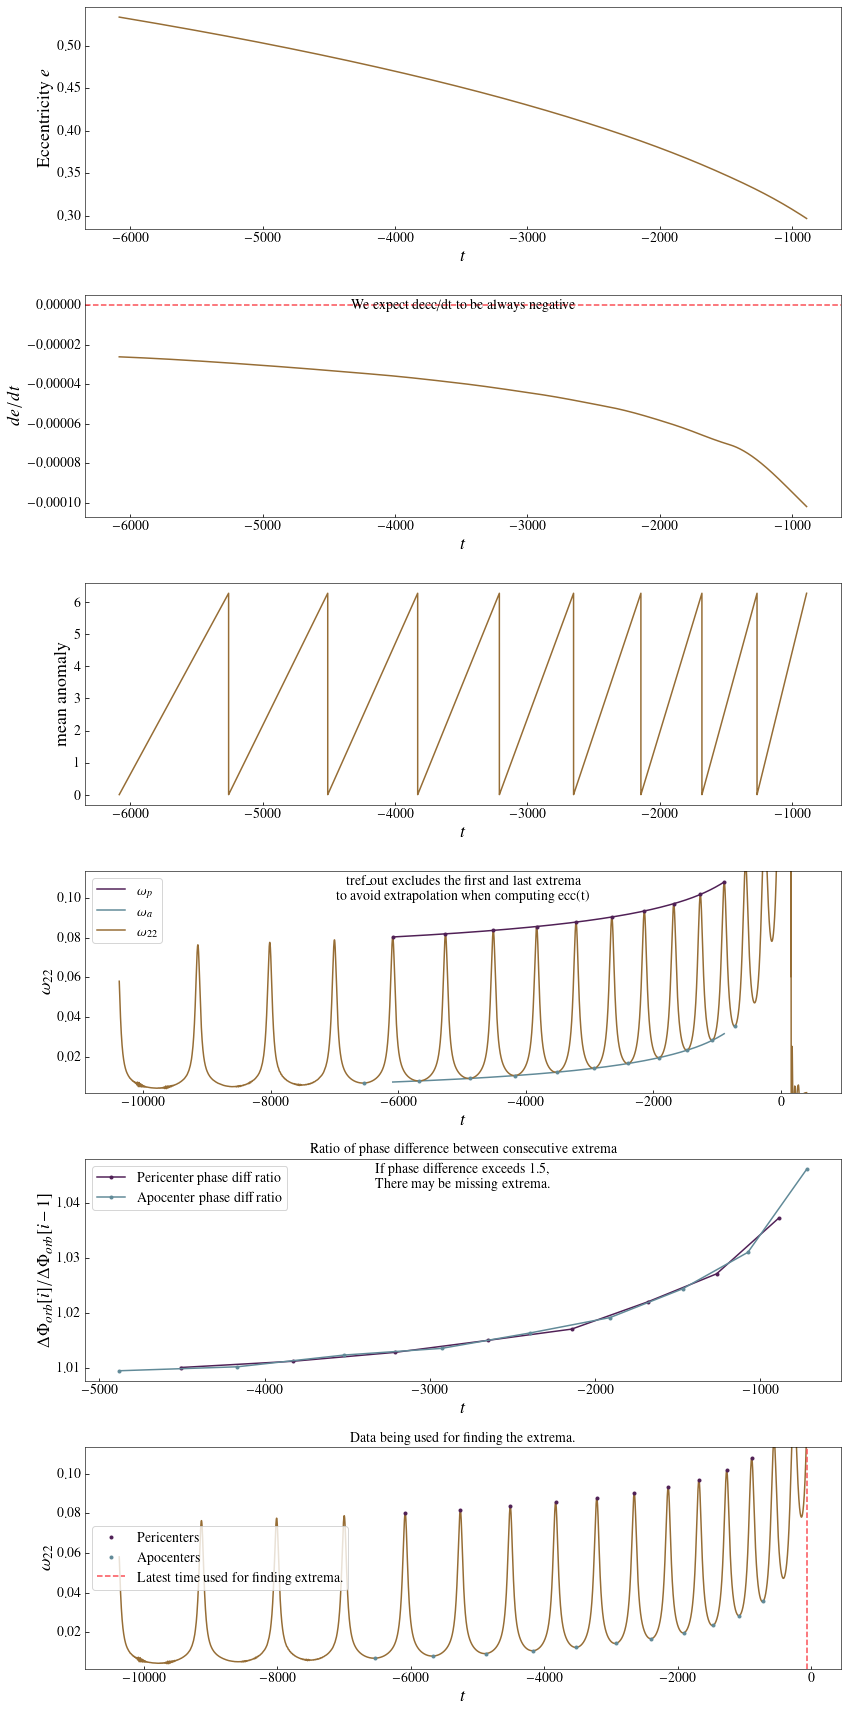

In [15]:
waveform_keywords = {"filepath": '../data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q6_e095_D65_Res3.h5',
                    "include_zero_ecc": False}
dataDict = load_waveform(catalog="LVCNR", **waveform_keywords)
method = "FrequencyFits"
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                return_gwecc_object=True,
                                                                extra_kwargs={"debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

### Debug issue #69

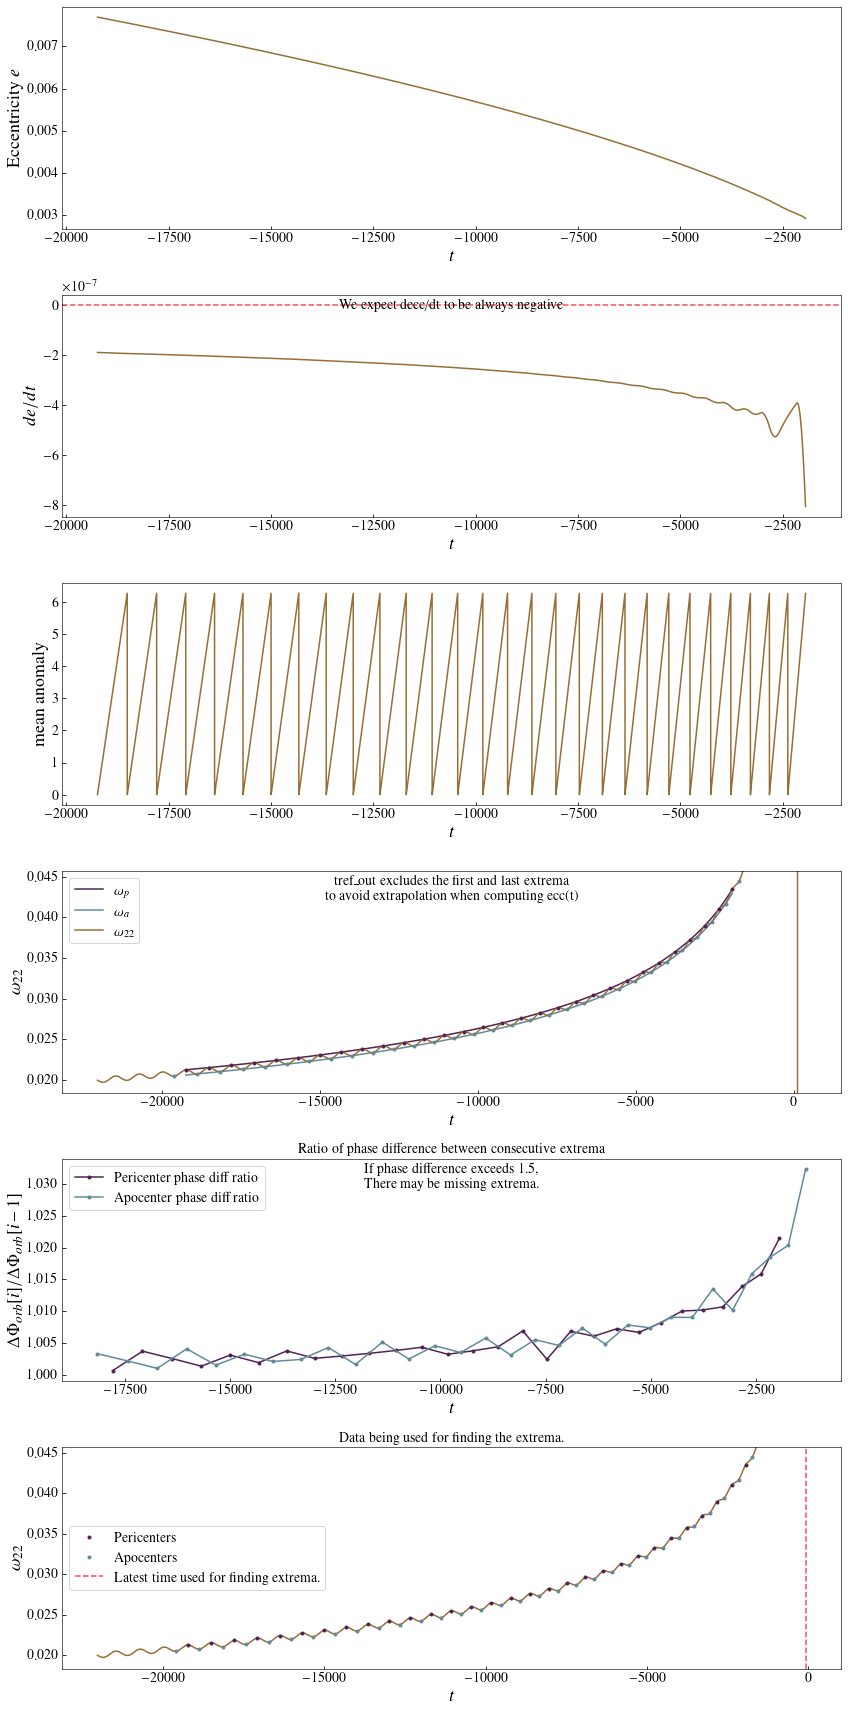

In [53]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0106376485_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
tref, measured_ecc, mean_ano, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                              method="FrequencyFits",
                                                              dataDict=dataDict,
                                                              return_gwecc_object=True,
                                                              extra_kwargs={"debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

### Debug issue 70

suggestion.   Loop and then fix the failed ones.   I'll put the failures above the loop, to make it easier to keep on running the loop

/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 3. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:540: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


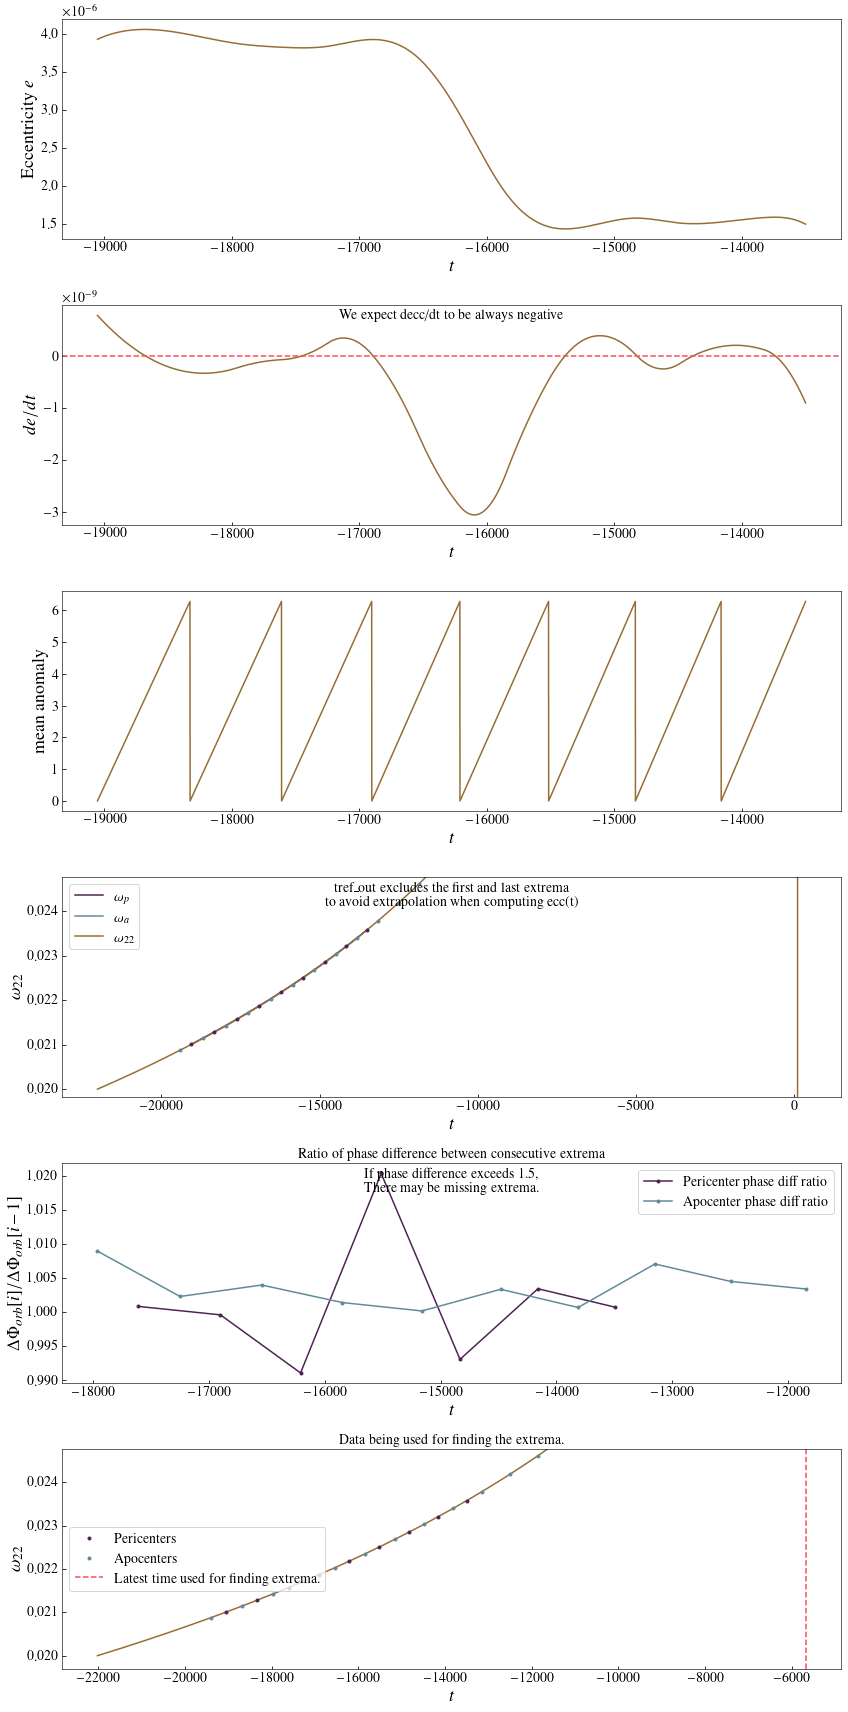

In [54]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000001000_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_gwecc_object=True,
                                                         extra_kwargs={
                                                            "num_orbits_to_exclude_before_merger": 20,                                                            # 'extrema_finding_kwargs': {"width": 25},
                                                         "debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

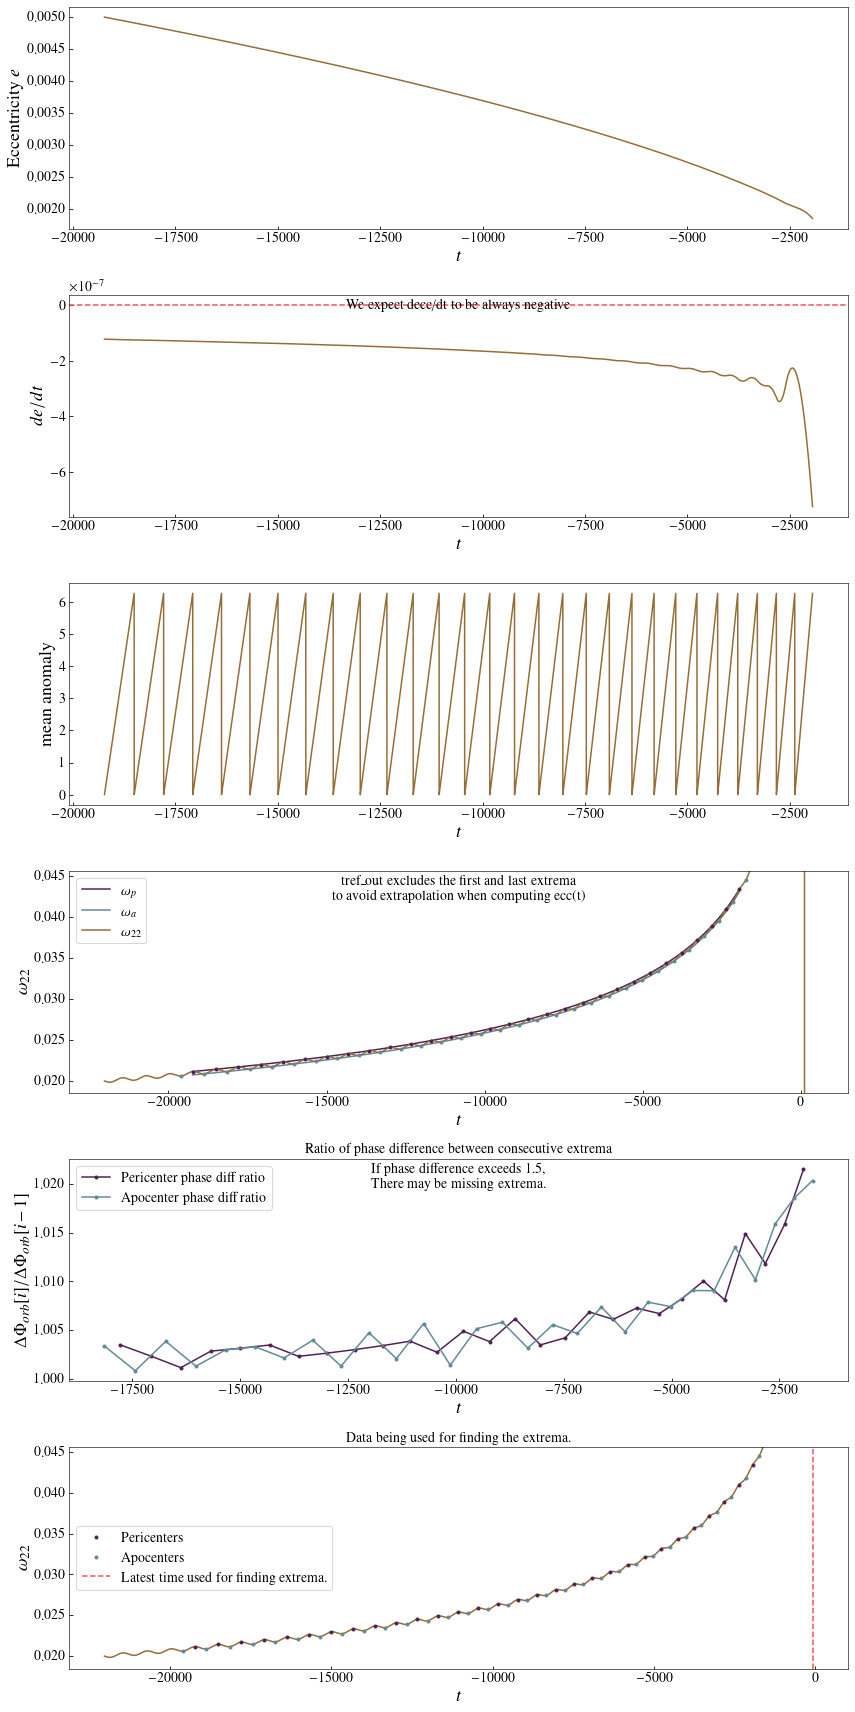

In [88]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0069012248_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_gwecc_object=True,
                                                         extra_kwargs={
                                                          #  "num_orbits_to_exclude_before_merger": 20,                                                            # 'extrema_finding_kwargs': {"width": 25},
                                                         "debug": False})
fig, ax = eccMethod.make_diagnostic_plots()

In [71]:
eob_files = sorted(glob.glob("../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00*_meanAno1.571.h5"))
waveform_eccs = []
model_eccs = [] 
failed_eccs = []
method = "FrequencyFits"

for fileName in tqdm.tqdm(eob_files[1:]):
    kwargs = {"filepath": fileName}
    dataDict = load_waveform(catalog="EOB", **kwargs)
    tref_in = dataDict["t"]
    ecc = re.findall(r"\d.\d{10}", fileName)[0]
    try:
        tref_out, measured_ecc, mean_ano = measure_eccentricity(
            tref_in=tref_in,
            dataDict=dataDict,
            method=method,
            extra_kwargs={"debug": False})
            # Get the measured eccentricity at the first available index.
            # This corresponds to the first extrema that occurs after the
            # initial time.
        waveform_eccs.append(measured_ecc[0])
        model_eccs.append(ecc)
    except Exception:
        failed_eccs.append(ecc)
        warnings.warn(f"Failed for {ecc}, file name = {fileName}.")
        print("--------------------------------------------------------------")

  0%|          | 0/150 [00:00<?, ?it/s]/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 3. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:540: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
 15%|█▌        | 23/150 [00:10<01:00,  2.09it/s]/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 2. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
 29%|██▉       | 44/150 [00:21<00:52,  2.04it/s]/Users/pfeiffer/research/22_GSF_Ecc_Analysis/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWar

### Issue 73

In [96]:
# Load test waveform
lal_kwargs = {"approximant": "EccentricTD",
              "q": 1.0,
              "chi1": [0.0, 0.0, 0.0],
              "chi2": [0.0, 0.0, 0.0],
              "Momega0": 0.01,
              "ecc": 0.1,
              "mean_ano": 0,
              "physicalUnits": True}
# load_waveform returns dataDict in physical units
dataDict = load_waveform(**lal_kwargs)

In [97]:
   tref_out, ecc_ref, meanano_ref, eccMethod = measure_eccentricity(
            tref_in=-0.6,
            method="FrequencyFits",
            dataDict=dataDict,
            return_gwecc_object=True,
            extra_kwargs={'debug':True})

t_analyse[0]=-0.7634569783359807, t_analyse[-1]=-0.00605437235609374, global fit to t<=-0.47844344014290163
global fit: guess p0=[459.19833748576565, 447.55513067426847, 0.0], bounds=[[0.0, 0.0, -0.004843497884874992], [4591.983374857657, 11934.80348464716, 0.3847556753460372]]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=21914, K_initial=1.200, p_initial=365(-0.00-t)^-0.381
it=1:  [1 / 21914 / 49219]
       find_peaks: width=1110, prominence=5.75527154636426
       idx_extrema=[ 7305 14496 21568 28520 35350 42057], Nleft=3, Nright=3, K=1.182
       Count_Nright_short=1
       idx_hi increased to 53378
it=2:  [1 / 21914 / 53378]
       idx_extrema=[ 7305 14496 21568 28520 35350 42057 48639], Nleft=3, Nright=4, K=1.183
       max_delta_omega=574.4 => fit updated to f_fit=474(-0.00-t)^-0.293
it=3:  [1 / 21914 / 53378]
       find_peaks: width=1110, prominence=5.698213471318883
       idx_extrema=[ 7306 14496 21568 28520 35351 420

AttributeError: 'eccDefinitionUsingFrequencyFits' object has no attribute 't_for_ecc_test'

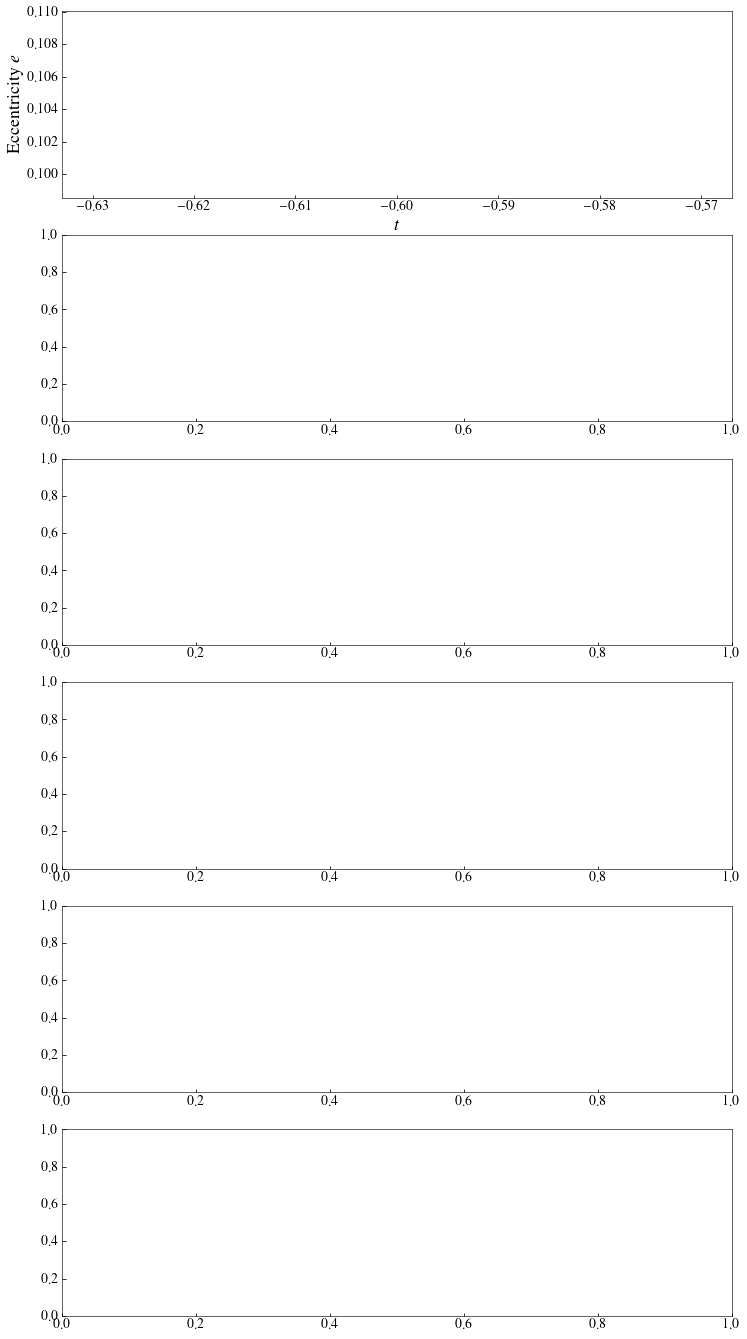

In [98]:
fig, ax = eccMethod.make_diagnostic_plots()

In [93]:
int(np.log10(25))

1

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:662: UserWarning: Number of pericenters and number of apocenters differ by 2. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:608: UserWarning: At least a pair of apocenters are too close. Minimum orbital phase diff is 3.1144855048860904. Times of occurrences are [-439.93787233]
  warnings.warn(f"At least a pair of {extrema_type} are too close."
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:614: UserWarning: Phase shift closer to pi than 2 pi detected.
  warnings.warn("Phase shift closer to pi than 2 pi detected.")
/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:626: UserWarning: At least a pair of apocenters are too far. Maximum orbital phase diff is 10.483024

(5e-07, 2e-05)

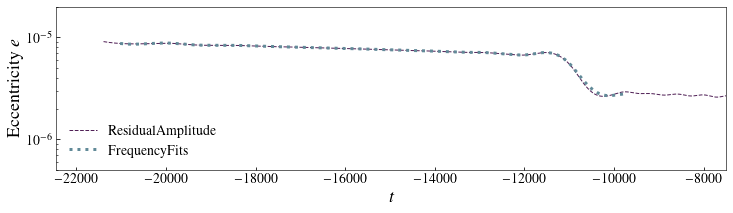

In [4]:
# Load data
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000104745_Momega00.010_meanAno1.571.h5",
                     "filepath_zero_ecc": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002_meanAno1.571.h5",
                     "include_zero_ecc": True}
dataDict = load_waveform(catalog="EOB", **waveform_keywords)
tref_vec = dataDict["t"]

# settings for the plot
from gw_eccentricity.plot_settings import use_fancy_plotsettings, figWidthsTwoColDict, lstyles, lwidths, colorsDict
style = "Notebook"
use_fancy_plotsettings(style=style)
fig, ax = plt.subplots(figsize=(figWidthsTwoColDict[style], 3))

for method in ["ResidualAmplitude", "FrequencyFits"]:
    tref_out, ecc_vec, mean_ano_vec, gwecc_obj = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": False})
    gwecc_obj.plot_measured_ecc(fig, ax, **{"ls": lstyles[method], "lw": lwidths[method], "c": colorsDict[method], "label": method})
ax.set_yscale("log")
ax.legend()
ax.set_xlim(right=-7500)
ax.set_ylim(5e-7, 2e-5)

In [32]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q8_e01_D14.5_Res3.h5"}
dataDict = load_waveform(origin="LVCNR", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": True})
print(ecc_vec)

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:158: UserWarning: kw params_dict is not a recognized key word in dataDict.
  warnings.warn(


t_analyse[0]=-7840.124505692787, t_analyse[-1]=-0.12450569278607185, global fit to t<=-4536.024505692788
global fit: guess p0=[0.03850488961050698, 3.683386479937406e-06, 0.0],  t_center=-3920.124505692787
            bounds=[[0.0, 0.0, -0.09960455422885749], [0.38504889610506976, 9.822363946499749e-05, 3920.124505692787]]
            result p_global=[4.36631085e-02 3.30891054e-06 1.27108110e+03]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=7775, K_initial=1.100, p_initial=1.26(+1271.08-t)^-0.393, refine_extrema=False
it=1:  [0 / 7775 / 23869],  K=1.100
       find_peaks: distance=2542, prominence=7.51321268467224e-07
       idx_extrema=   [   98  4683  9193 13633 17990 22260], Nleft=2, Nright=4
 idx_extrema_plain=  [   98  4683  9193 13633 17990 22260]
       t[idx_extrema]=[-7830.32 -7371.82 -6920.82 -6476.82 -6041.12 -5614.12]
       idx_ref increased to 11413
       idx_hi increased to 26348
it=2:  [0 / 11413 / 26348],  K=1

/Users/pfeiffer/research/Projects/gw_eccentricity/notebook/../gw_eccentricity/eccDefinition.py:713: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


In [8]:
help(load_waveform)

Help on function load_waveform in module gw_eccentricity.load_data:

load_waveform(origin='LAL', **kwargs)
    Load waveform.
    
    parameters:
    ----------
    origin: str
        The origin of the waveform to be provided.  This can be one of
        - "LAL": Compute waveform by a call to the LAL-library.
        - "LVCNR": Import waveform by reading a file in the LVCNR-data format.
        - "EOB": Import EOB waveform generated using SEOBNRv4EHM
            (arxiv:2112.06952).
        - "EMRI": Import EMRI waveform generated by Maarten.
        In each case, the `kwargs` dictionary provides the needed information
        to uniquely specify the waveform.
    kwargs:
        Kwargs dictionary to be passed to the waveform loading functions.
        As mentioned above, the dictionary would depend on the `origin`
        of the waveform to be loaded/imported/generated.
        - "LAL": For generating waveform calling the LAL library. See
            load_data.load_LAL_waveform for t